In [1]:
"""
Purpose: To Run the proofreading of neurons in the 
test set and measure the precision and recall of the new rules



"""

'\nPurpose: To Run the proofreading of neurons in the \ntest set and measure the precision and recall of the new rules\n\n\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-25 20:33:57,777 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:33:57,780 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:33:57,781 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:33:57,804 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-25 20:33:57,805 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:33:57,820 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-25 20:33:58,255 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:33:58,259 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:33:58,260 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:33:58,260 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:33:58,261 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:33:58,262 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:33:58,262 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:33:58,265 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:33:58,711 - settings - Setting enable_python_native_blobs to True


In [4]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-25 20:33:58,836 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:33:58,837 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:33:58,838 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:33:58,842 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:33:59,328 - settings - Setting enable_python_native_blobs to True


In [5]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Runnig the validation

In [6]:
"""
Psueodocode: 
1) Pull down the segment ids of the valid neurons

For each neuron
1) Dwonload the neuron object
2) Run the Proofreading
3) Print out the validation plot
4) Save the validation df

"""

'\nPsueodocode: \n1) Pull down the segment ids of the valid neurons\n\nFor each neuron\n1) Dwonload the neuron object\n2) Run the Proofreading\n3) Print out the validation plot\n4) Save the validation df\n\n'

In [7]:
segment_ids = minnie.AutoProofreadValidationBorderNeurons().fetch("segment_id")

In [8]:
job_idx = 0
job_step = 5
segments_to_process = segment_ids[job_idx*job_step:(job_idx+1)*job_step]
segments_to_process

array([864691135735426708, 864691135589907979, 864691136311791677,
       864691135866394390, 864691135699269154])


--- Working on Neuron 864691135735426708 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 256, # error synapses  = 4, # error presyns = 0
For postsyn: # valid synapses = 2846, # error synapses  = 607, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 3713
n_valid_syn_ids_presyn = 256
n_errored_syn_ids_presyn = 4
n_valid_syn_ids_postsyn = 2846
n_errored_syn_ids_postsyn = 607
Segment Id = 864691135735426708
Postsyn counts:
TP:2674
TN:607
FP:172
FN:0
Presyn counts:
TP:88
TN:4
FP:168
FN:0


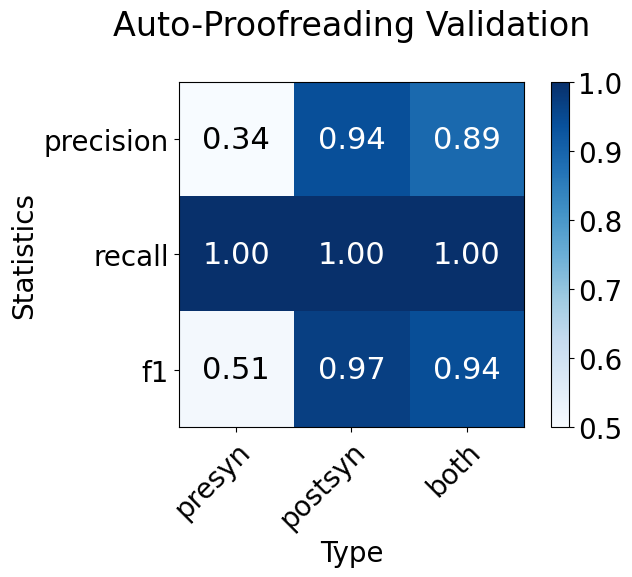

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691135735426708_validation_df.pbz2
File size is 0.075876 MB
Total time for neuron 864691135735426708: 47.21210527420044

--- Working on Neuron 864691135589907979 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 521, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 3913, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 4434
n_valid_syn_ids_presyn = 521
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 3913
n_errored_syn_ids_postsyn = 0
Segment Id = 864691135589907979
Postsyn counts:
TP:3892
TN:0
FP:21
FN:0
Presyn counts:
TP:53
TN:0
FP:468
FN:0


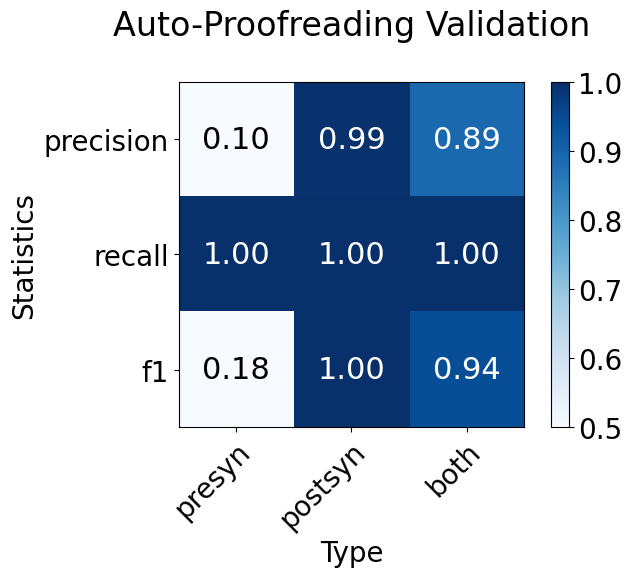

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691135589907979_validation_df.pbz2
File size is 0.090258 MB
Total time for neuron 864691135589907979: 64.404541015625

--- Working on Neuron 864691136311791677 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 446, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 7012, # error synapses  = 1, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 7459
n_valid_syn_ids_presyn = 446
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 7012
n_errored_syn_ids_postsyn = 1
Segment Id = 864691136311791677
Postsyn counts:
TP:6971
TN:0
FP:41
FN:1
Presyn counts:
TP:131
TN:0
FP:315
FN:0


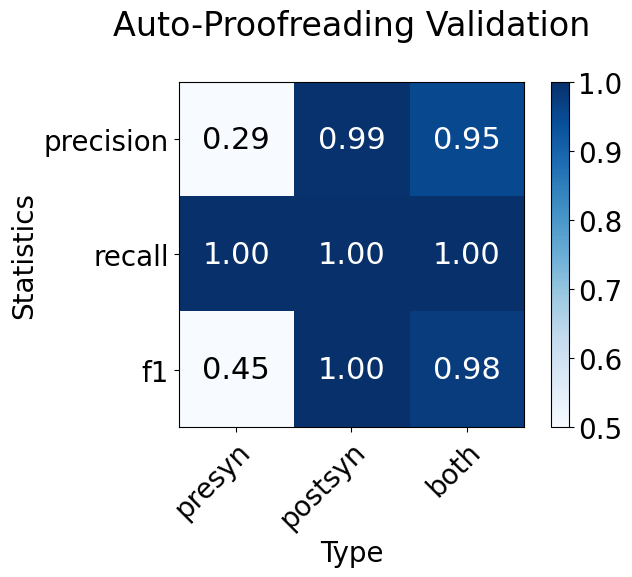

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691136311791677_validation_df.pbz2
File size is 0.148709 MB
Total time for neuron 864691136311791677: 111.11491656303406

--- Working on Neuron 864691135866394390 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 838, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 9311, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 10149
n_valid_syn_ids_presyn = 838
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 9311
n_errored_syn_ids_postsyn = 0
Segment Id = 864691135866394390
Postsyn counts:
TP:9304
TN:0
FP:7
FN:0
Presyn counts:
TP:346
TN:0
FP:492
FN:0


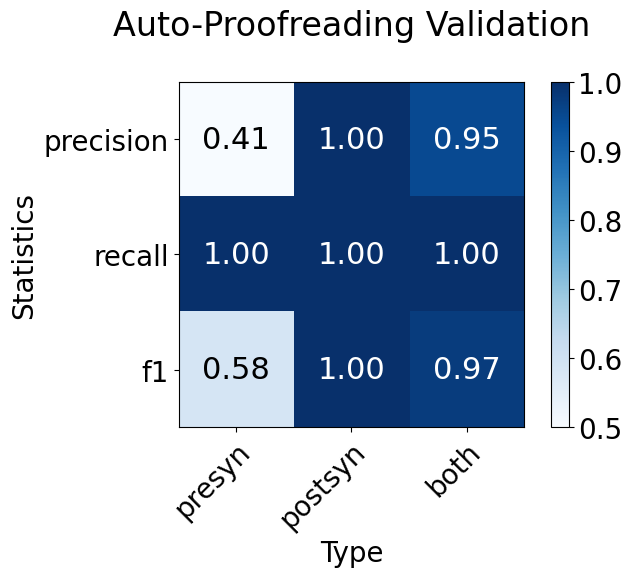

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691135866394390_validation_df.pbz2
File size is 0.197888 MB
Total time for neuron 864691135866394390: 256.2052323818207

--- Working on Neuron 864691135699269154 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 185, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 4598, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 4783
n_valid_syn_ids_presyn = 185
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 4598
n_errored_syn_ids_postsyn = 0
Segment Id = 864691135699269154
Postsyn counts:
TP:4573
TN:0
FP:25
FN:0
Presyn counts:
TP:38
TN:0
FP:147
FN:0


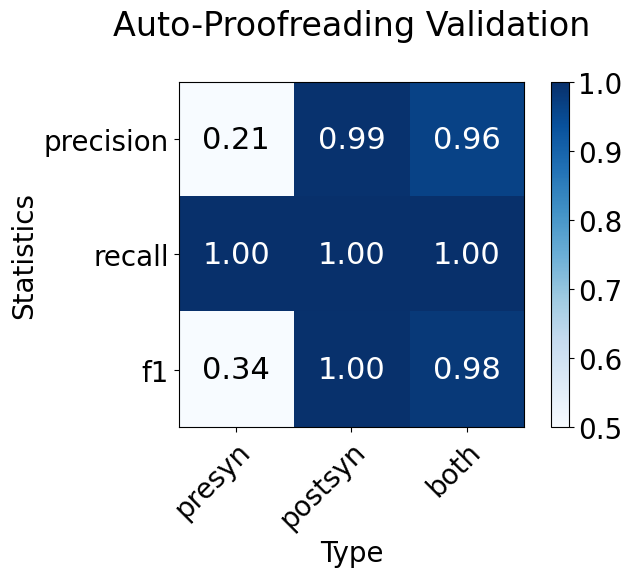

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691135699269154_validation_df.pbz2
File size is 0.096772 MB
Total time for neuron 864691135699269154: 160.30776572227478


In [10]:
for seg_id in segments_to_process:
    print(f"\n--- Working on Neuron {seg_id} --")
    st = time.time()
    
    
    #1) Dwonload the neuron object
    neuron_obj = du.fetch_neuron_obj_manual(seg_id,
                                       border_validation=True)
    
    (filt_neuron,
     return_synapse_df_revised,
    return_validation_df_revised) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                        filter_list = [],
                        plot_limb_branch_filter_with_disconnect_effect = False,
                        verbose = False,
                        plot_score=False,
                                                             apply_non_axon_presyn_errors = False)
    
    vu.synapse_validation_df_to_score_plot(return_validation_df_revised)
    
    su.compressed_pickle(return_validation_df_revised,f"./baseline_data/{seg_id}_validation_df")
    
    print(f"Total time for neuron {seg_id}: {time.time() - st}")